In [1]:
import os
os.chdir("/Users/ieo5776/Desktop/signal_processing_course/")
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack
import scipy.signal
import scipy.io.wavfile
import scipy.signal
import copy

# Filter a signal
In this notebook i'll try to filter a signal to match the provided solution

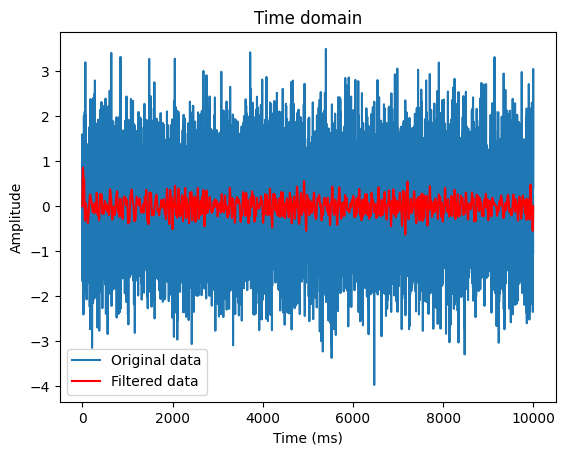

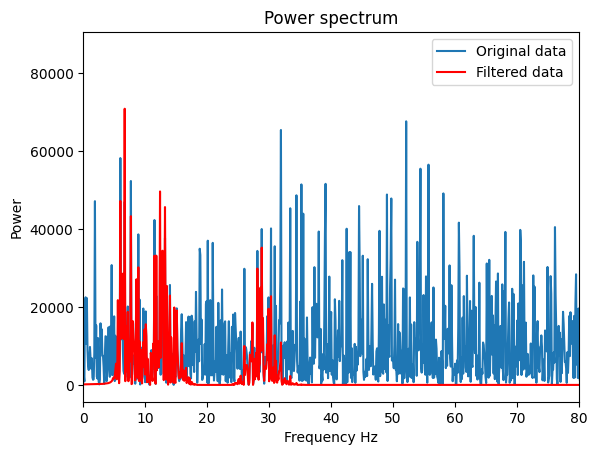

In [2]:
# Load signal to filt
mat = scipy.io.loadmat("SignalProcessing/filtering/filtering_codeChallenge")
fs = mat['fs'][0]
original = mat['x'][:,0] # ALWAYS check the shape of the array!!
filtSignal = mat['y'][:,0]
timevec = np.arange(0, len(original))/fs

# have a look at both signal in time domain, in ms
plt.plot(timevec*1000, original, label="Original data")
plt.plot(timevec*1000, filtSignal, 'r', label="Filtered data")
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Time domain")
plt.show()

# Same in freq spectrum
hz = np.linspace(0,fs/2,int(np.floor(len(filtSignal)/2)+1))
pwr_original = np.abs(scipy.fftpack.fft(original))**2 # if data.shape is not 1, then fftpack.fft() requires axis to compute FFT
pwr_filt = np.abs(scipy.fftpack.fft(filtSignal))**2


plt.plot(hz, pwr_original[0:len(hz)], label="Original data")
plt.plot(hz, pwr_filt[:len(hz)], 'r', label="Filtered data")
plt.legend()
plt.xlabel('Frequency Hz')
plt.ylabel('Power')
plt.title('Power spectrum')
plt.xlim(0, 80)
plt.show()

# Solution
I have tried different things, and most end up erasing a part of the signal. What i have found might that works decently is to take wide band filter `firls` to cover ~5-32 Hz, and then a sharper `fir1` to notch out between 15 and 25 Hz.

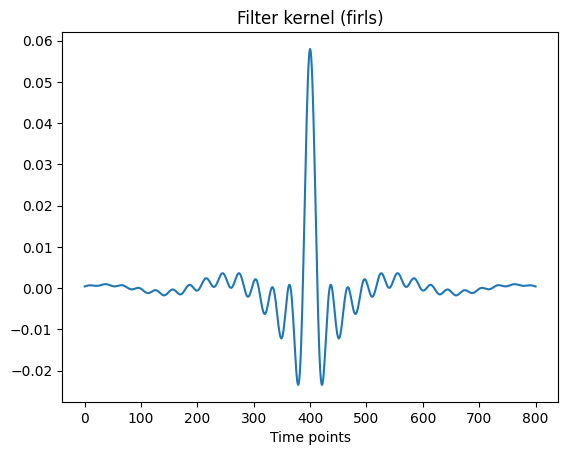

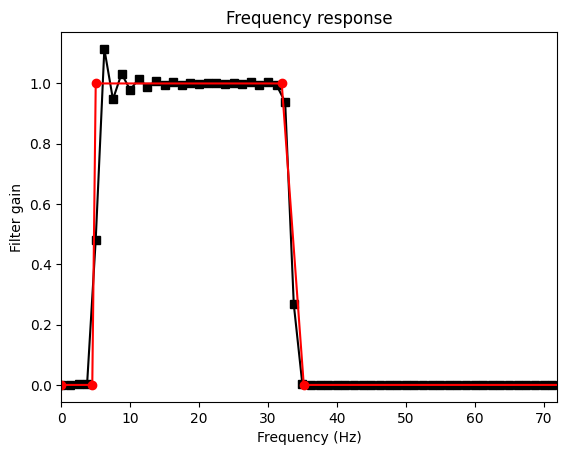

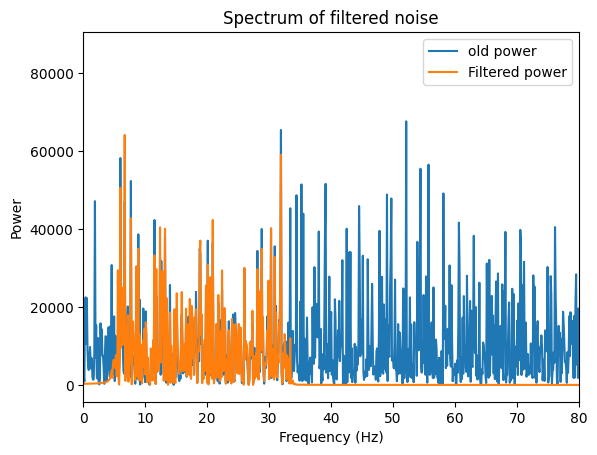

In [3]:
# Set bounds
l_bound = 5
h_bound = 32
transw= .1

order = 4*np.round(int(fs)/l_bound)+1

filter_shape = [ 0,0,1,1,0,0 ]
filter_freqs = [ 0, l_bound*(1-transw), l_bound, h_bound, h_bound+h_bound*transw, int(fs)/2 ]

# Filter and power spectrum
filterkern = scipy.signal.firls(order,filter_freqs,filter_shape,fs=int(fs))
hz = np.linspace(0,fs/2,int(np.floor(len(filterkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filterkern))**2

## plots
plt.plot(filterkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')
plt.show()

# plot amplitude spectrum of the filter kernel
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.plot(filter_freqs,filter_shape,'ro-')
plt.xlim([0,h_bound+40])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

# Filtering
filt_sign = scipy.signal.filtfilt(filterkern, 1, original)

# plot power spectrum
new_spct = np.abs(scipy.fftpack.fft(filt_sign))**2
hz = np.linspace(0,int(fs),len(new_spct))

plt.plot(hz,pwr_original,label='old power')
plt.plot(hz,new_spct,label='Filtered power')
plt.xlim([0,80])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.title('Spectrum of filtered noise')
plt.show()



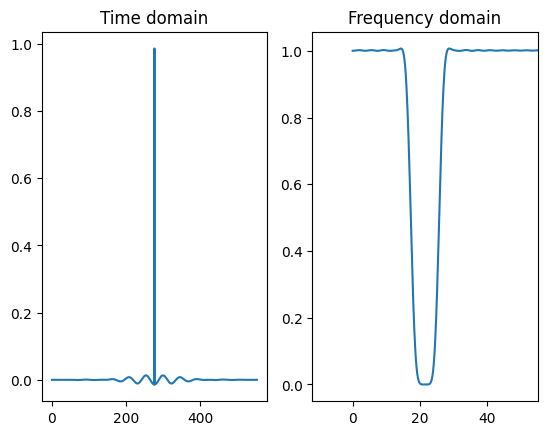

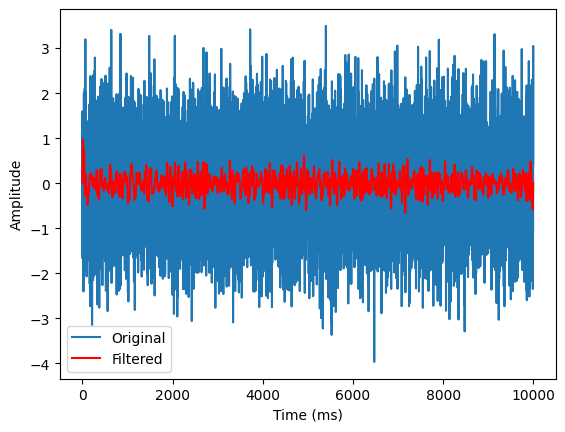

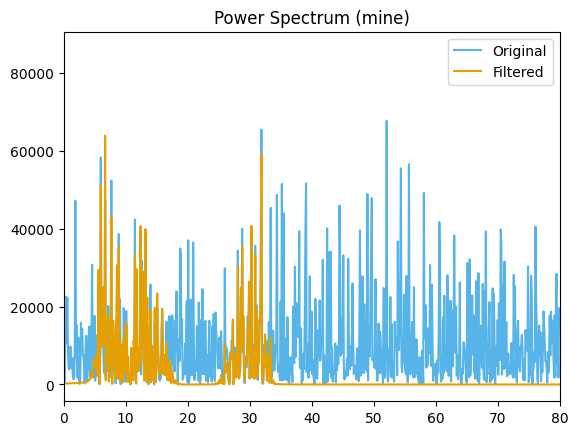

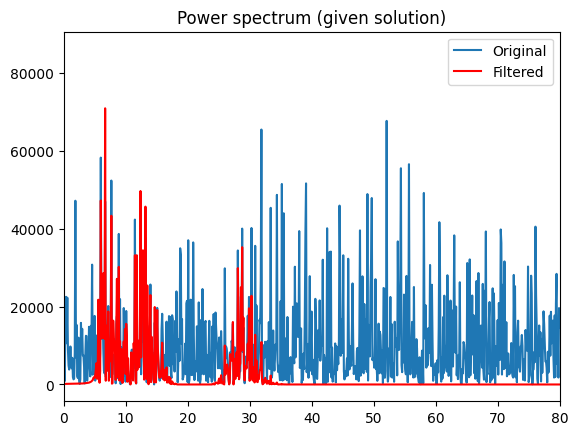

In [6]:
# Now notch out the frequencies between the two interesting frequencies
Hz2notch = [18, 25]

# Set boundaries and test some different orders
frange = [Hz2notch[0], Hz2notch[1]]
order  = int( 10*(int(fs)/frange[0]) )
order  = order + ~order%2

# filter kernel
filtkern = scipy.signal.firwin( order,frange,pass_zero=True,fs=int(fs) )

# visualize the kernel and its spectral response
plt.subplot(121)
plt.plot(filtkern)
plt.title('Time domain')

plt.subplot(122)
plt.plot(np.linspace(0,int(fs),10000),np.abs(scipy.fftpack.fft(filtkern,10000))**2)
plt.xlim([Hz2notch[0]-30, Hz2notch[1]+30])
plt.title('Frequency domain')
plt.show()

# Applying the filter
datafilt = scipy.signal.filtfilt(filtkern,1,filt_sign)

## plot the signal in time domain
plt.plot(timevec*1000,original,label='Original')
plt.plot(timevec*1000,datafilt,'r',label='Filtered')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# compute the power spectrum of the filtered signal
pwrfilt = np.abs(scipy.fftpack.fft(datafilt))**2

# plot power spectrum
plt.plot(hz, pwr_original,'#56B4E9',label='Original')
plt.plot(hz,pwrfilt,'#E69F00',label='Filtered')
plt.legend()
plt.xlim(0,80)
plt.title('Power Spectrum (mine)')
plt.show()

plt.plot(hz, pwr_original[0:len(hz)],label='Original')
plt.plot(hz, pwr_filt[:len(hz)], 'r',label='Filtered')
plt.title('Power spectrum (given solution)')
plt.legend()
plt.xlim(0, 80)
plt.show()